In [1]:
from platform import python_version


print(python_version())

3.12.1


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [3]:
df=pd.read_csv("Churn_Modelling (1).csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df1=df.drop(columns=['RowNumber','CustomerId','Surname',])

In [9]:
df.shape

(10000, 14)

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dummies=pd.get_dummies(df.Geography)

In [12]:
dummies.head()

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True


In [13]:
dummies.drop(columns=['Spain'])

,France,Germany
0,True,False
1,False,False
2,True,False
3,True,False
4,False,False
...,...,...
9995,True,False
9996,True,False
9997,True,False
9998,False,True


In [14]:
df1=pd.concat([df,dummies.drop(['Spain'],axis='columns')],axis='columns')

In [15]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,True,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,True,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False


In [16]:
df2=df1.drop(columns=['Geography'])

In [17]:
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False


In [18]:
dummy1=pd.get_dummies(df.Gender)

In [19]:
dummy1.head()

,Female,Male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [20]:
df3=pd.concat([df2,dummy1.drop(['Female'],axis='columns')],axis='columns')

In [21]:
df3.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Male
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,False
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,False


In [22]:
df4=df3.drop(columns=['Gender'])
df4.head()
df4=df4.drop(columns=['RowNumber','CustomerId','Surname'])

In [23]:
df4.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,False


In [24]:
X=df4.drop(columns=['Exited'])
y=df4.Exited
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Male
7496,824,49,8,133231.48,1,1,1,67885.37,False,True,True
7694,676,64,4,116954.32,1,1,1,91149.48,False,False,False
9248,629,34,6,0.00,2,1,0,190347.72,False,False,True
2470,689,31,3,139799.63,1,0,1,120663.57,False,False,False
4392,787,51,0,58137.08,1,0,1,142538.31,True,False,True


In [25]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)


In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
import torch

torch.__version__

'2.7.0+cpu'

In [28]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available. PyTorch will use the GPU.')
else:
    device = torch.device('cpu')
    print('GPU is not available. PyTorch will use the CPU.')

print(f'Using device: {device}')

GPU is not available. PyTorch will use the CPU.
Using device: cpu


In [29]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [30]:
model=Sequential()

In [31]:
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\91637\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

In [34]:
history=model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2,batch_size=32,callbacks=[early_stopping])

Epoch 1/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6413 - loss: 0.6373 - val_accuracy: 0.8112 - val_loss: 0.4585
Epoch 2/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7929 - loss: 0.4750 - val_accuracy: 0.8213 - val_loss: 0.4325
Epoch 3/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8060 - loss: 0.4402 - val_accuracy: 0.8269 - val_loss: 0.4206
Epoch 4/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8211 - loss: 0.4210 - val_accuracy: 0.8213 - val_loss: 0.4149
Epoch 5/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.4202 - val_accuracy: 0.8275 - val_loss: 0.4065
Epoch 6/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8270 - loss: 0.4112 - val_accuracy: 0.8231 - val_loss: 0.4010
Epoch 7/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8449 - loss: 0.3829 - val_accuracy: 0.8231 - val_loss: 0.3951
Epoch 8/500
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8303 - loss: 0.4014 - val_accu

In [35]:
y_log=model.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8455

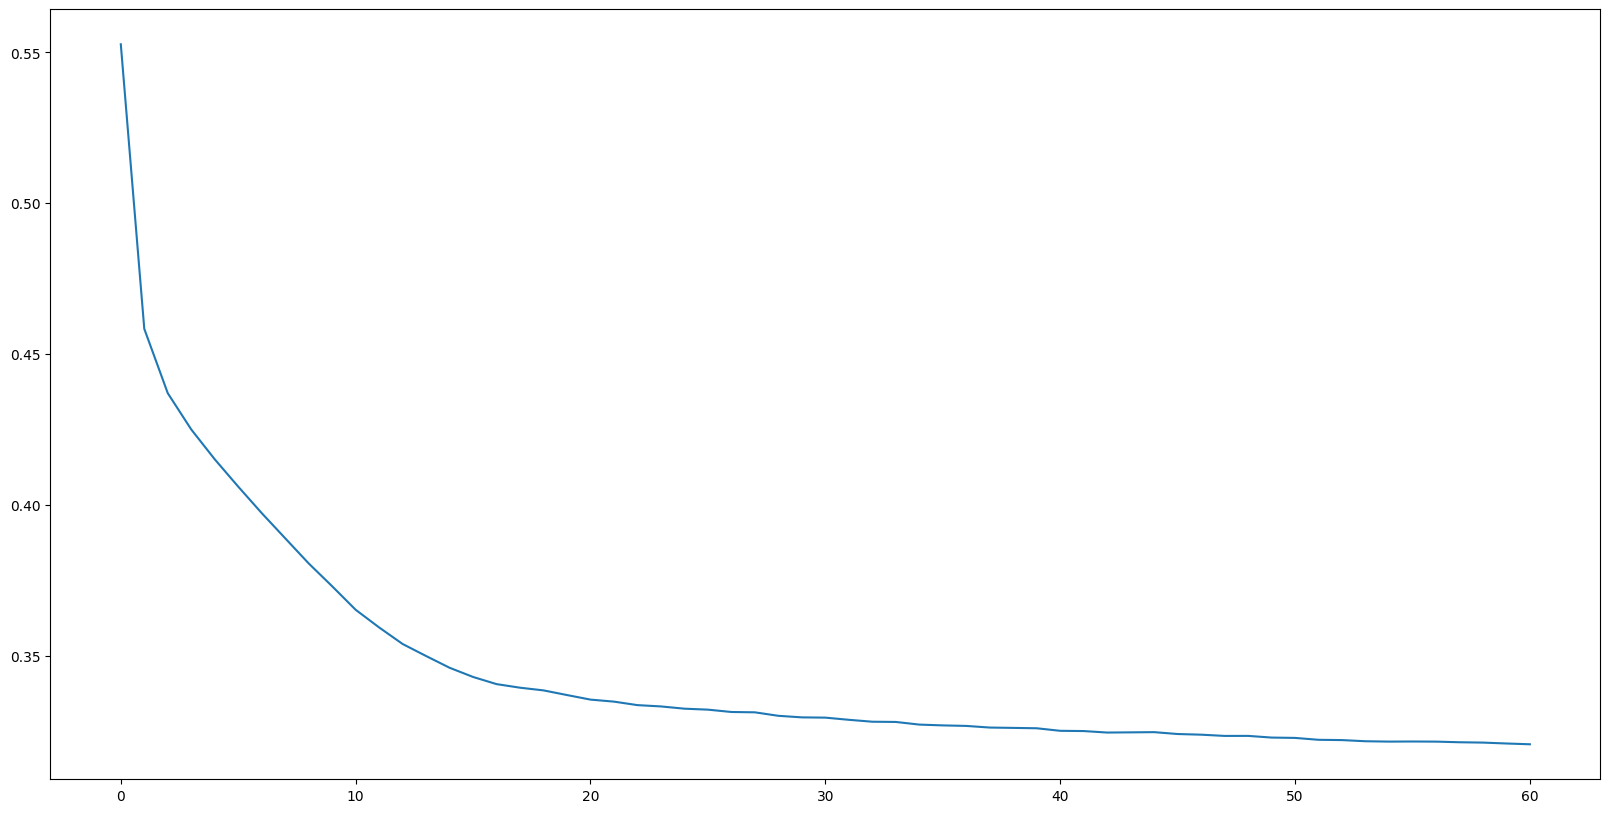

In [39]:
plt.plot(history.history['loss'])


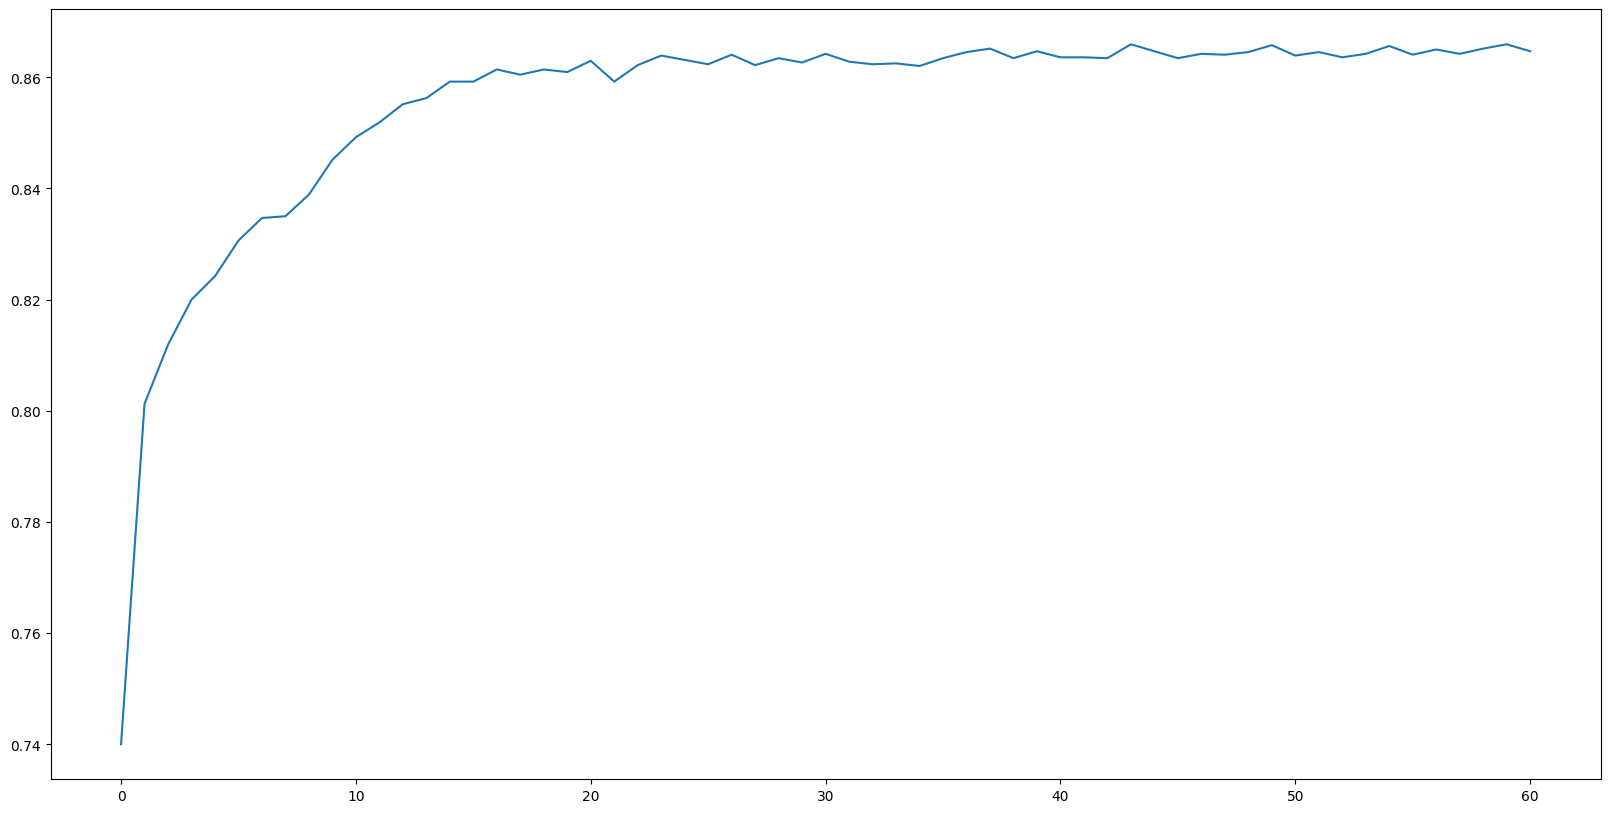

In [40]:
plt.plot(history.history['accuracy'])